In [2]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
from datetime import timedelta, datetime

sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False) 

c:\Users\wooyong\anaconda3\envs\kwix\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
C:\Users\wooyong\AppData\Local\Temp/ipykernel_18656/2378865906.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [3]:
# df_1111 = pd.read_excel('track1_11번가.xlsx',sheet_name = None)
# df_nnnn = pd.read_excel('track1_네이버.xls',sheet_name = None)

# sheets_11 = list(df_1111.keys())
# df_11 = pd.DataFrame([])

# for i in sheets_11:
#     df1 = pd.read_excel('track1_11번가.xlsx',sheet_name = i)
#     df1['날짜'] = i
#     df_11 = pd.concat([df_11, df1])

# sheets_n = list(df_nnnn.keys())
# df_n = pd.DataFrame([])

# for i in sheets_n:
#     df2 = pd.read_excel('track1_네이버.xls',sheet_name = i)
#     df2['날짜'] = i
#     df_n = pd.concat([df_n, df2])
    

# report = df_n.profile_report(title='네이버 데이터')
# report.to_file('네이버 데이터.html')
# report = df_11.profile_report(title='11번가 데이터')
# report.to_file('11번가 데이터.html')

In [4]:
# df_n.to_pickle('df_n.pkl')
# df_11.to_pickle('df_11.pkl')
df_n = pd.read_pickle('df_n.pkl')
df_n.reset_index(drop= True,inplace=True)
df_11= pd.read_pickle('df_11.pkl')
df_11.reset_index(drop= True,inplace=True)

In [5]:
# df_n['주문일'] 날짜형식으로 전환 및 요일
df_n['주문일'] = pd.to_datetime(df_n['주문일'], format = '%Y%m%d')
df_n.insert(3, '구매연도', df_n['주문일'].dt.year)
df_n.insert(4, '구매월', df_n['주문일'].dt.month)
df_n.insert(5, '구매일', df_n['주문일'].dt.day)
df_n.insert(6, '구매요일', df_n['주문일'].dt.day_name('ko_KR'))


#운송장 등록일자 기준 도착일 지정, 운송장 등록 기준 반나절내에 택배사 도착, 12시 이후는 다음날로 설정함
df_n['운송장등록일자'] = pd.to_datetime(df_n['운송장등록일자'])
df_n['운송장등록일자_시간'] = df_n['운송장등록일자'].dt.time
df_n.insert(10,'운송장등록_도착날짜',df_n['운송장등록일자'].dt.floor('D'))
df_n.loc[df_n['운송장등록일자_시간'] >= pd.to_datetime('12:00:00').time(), '운송장등록_도착날짜'] = df_n.loc[df_n['운송장등록일자_시간'] >= pd.to_datetime('12:00:00').time(), '운송장등록_도착날짜'] + pd.DateOffset(days=1)


#배송기간 설정
df_n.insert(12,'배송기간',df_n['운송장등록_도착날짜'] - df_n['주문일'])

# 주문일의 요일에 따라 주말 또는 평일로 구분하는 컬럼 생성
df_n['요일'] = df_n['주문일'].dt.weekday
df_n.insert(7,'평일/주말',df_n['요일'].apply(lambda x: '주말' if x >= 5 else '평일') )

#필요없는 셀 정리
df_n.drop(columns = ['날짜','요일','운송장등록일자_시간','등록일자'],inplace=True)

In [6]:
# df_11['주문일'] 날짜형식으로 전환 및 요일
df_11['주문일'] = pd.to_datetime(df_11['주문일'], format = '%Y%m%d')
df_11.insert(3, '구매연도', df_11['주문일'].dt.year)
df_11.insert(4, '구매월', df_11['주문일'].dt.month)
df_11.insert(5, '구매일', df_11['주문일'].dt.day)
df_11.insert(6, '구매요일', df_11['주문일'].dt.day_name('ko_KR'))


#운송장 등록일자 기준 도착일 지정, 운송장 등록 기준 반나절내에 택배사 도착, 12시 이후는 다음날로 설정함
df_11['운송장등록일자'] = pd.to_datetime(df_11['운송장등록일자'])
df_11['운송장등록일자_시간'] = df_11['운송장등록일자'].dt.time
df_11.insert(10,'운송장등록_도착날짜',df_11['운송장등록일자'].dt.floor('D'))
df_11.loc[df_11['운송장등록일자_시간'] >= pd.to_datetime('12:00:00').time(), '운송장등록_도착날짜'] = df_11.loc[df_11['운송장등록일자_시간'] >= pd.to_datetime('12:00:00').time(), '운송장등록_도착날짜'] + pd.DateOffset(days=1)


#배송기간 설정
df_11.insert(12,'배송기간',df_11['운송장등록_도착날짜'] - df_11['주문일'])

# 주문일의 요일에 따라 주말 또는 평일로 구분하는 컬럼 생성
df_11['요일'] = df_11['주문일'].dt.weekday
df_11.insert(7,'평일/주말',df_11['요일'].apply(lambda x: '주말' if x >= 5 else '평일') )

#필요없는 셀 정리
df_11.drop(columns = ['날짜','요일','운송장등록일자_시간'],inplace=True)

In [7]:
# 타켓으로 할 기념일 선정
기념일 = {'어린이날': '20220505',
          '어버이날': '20220508'}

# 기념일부터 일주일 전의기간 추출
기념일주간 = {}
for key, value in 기념일.items():
    기념일주간[key] = []
    기념일_날짜 = datetime.strptime(value, '%Y%m%d')
    주간_시작 = 기념일_날짜 - timedelta(weeks=1)
        
    # 주간 범위 내 모든 날짜 추가 (5월 이상만)
    while 주간_시작 <= 기념일_날짜:
        if 주간_시작.month == 5:
            기념일주간[key].append(주간_시작.strftime('%Y-%m-%d'))
        주간_시작 += timedelta(days=1)

기념일df_n = df_n[df_n['주문일'].isin([date for lst in 기념일주간.values() for date in lst])];기념일df_n.head(3)


,거래처,거래처주문번호,주문일,구매연도,구매월,구매일,구매요일,평일/주말,사은품여부,출고예정일,...,자재명,초기자재수량,주문수량,취소수량,반품수량,배송유형,마감구분,플랜트 정보,단독배송여부,GS홈쇼핑주문번호
108424,외부몰_직거래_네이버(신),2022050641454531,2022-05-06,2022,5,6,금요일,평일,Y,20220517,...,NaN,1,0,0,1,택배배송,상온,동탄센터 > 동탄일반,N,NaN
108425,외부몰_직거래_네이버(신),2022050641454531,2022-05-06,2022,5,6,금요일,평일,Y,20220515,...,더비비고 영양꼬리곰탕 500G/상온,1,0,1,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN
108426,외부몰_직거래_네이버(신),2022050641454531,2022-05-06,2022,5,6,금요일,평일,Y,20220515,...,NaN,1,0,1,0,택배배송,상온,동탄센터 > 동탄일반,N,NaN


In [8]:
#자재명을 str타입으로 변경
df_n['자재명'] = df_n['자재명'].astype(str)

In [9]:
# 정규 표현식 패턴을 사용하여 *뒤의 숫자와 EA앞의 숫자를 추출
pattern1 = r'(?<=G\*)\d+'
pattern2 = r'(?<=\b)\d+(?=EA\b)'

def extract_numbers(text):
    if '*' in text:
        match = re.search(pattern1, text)
        if match:
            return match.group()
    elif 'EA' in text:
        match = re.search(pattern2, text)
        if match:
            return match.group()
    return None

df_n['실제_상품수량'] = df_n['자재명'].apply(extract_numbers)

In [10]:
def extract_numbers(text):
    if '*' in text:
        match = re.search(pattern1, text)
        if match:
            return match.group()
    elif 'EA' in text:
        match = re.search(pattern2, text)
        if match:
            return match.group()
    else:
        return 0
    return None

df_n['실질상품수량'] = df_n['자재명'].apply(extract_numbers)

In [11]:
df_n['실질상품수량'].fillna(1, inplace=True)
df_n['실질상품수량'] = df_n['실질상품수량'].astype(int)

#앞으로 수량으로 사용할 새로운 컬럼 정의
df_n['실질상품수량X주문수량'] = df_n['실질상품수량'] * df_n['주문수량']
df_n.query('실질상품수량 != 0')[['실질상품수량','주문수량','실질상품수량X주문수량']]

,실질상품수량,주문수량,실질상품수량X주문수량
8,24,1,24
13,2,10,20
32,2,2,4
33,2,4,8
50,24,1,24
...,...,...,...
172087,20,3,60
172090,24,1,24
172093,3,12,36
172094,24,1,24


In [12]:
#브랜드명 추출
pattern = r'(비비고|햇반|고메|백설|다시다|다담|스팸|맛밤|맛군밤|맥스봉|더건강한|즐거운동행|쁘띠첼|산들애|설탕|밥이랑|크레잇|밸런스밀|쿡킷|올리고당|요리당|물엿|식초|참좋은 조미김가루|천일염|파스타소스|가루|시럽|하선정|소금|알찬소시지|아메리칸스타일포크|빅소시지|행복한콩|고급면용|쉐프솔루션|푸드웨어|파우더|남원|물로만끓여도|유|기름|믹스|중력|박력|강력|분|고추장|된장|쌈장|비빔장|톡톡까먹어밤|한식예찬|아이미|쉐프솔루션|동그랑땡|CJ|특별한선택|함흥비빔냉면소스|프레시안구이|고기팡팡미트볼|고단백 두부면|미정당|오리지널후랑크|햄스빌|한입쏙 비엔나|프레시안|아티장|가쓰오|4무|주부초밥왕|제일제면소|삼호|얼큰우동|오리지널부어스트|청양초 매운물냉면|씨제이)'

def extract_brand(text):
    match = re.search(pattern, text)
    if match:
        return match.group()
    else:
        return None

df_n['브랜드'] = df_n['자재명'].apply(extract_brand)


In [13]:
# 자재명에 브랜드명이 포함되지 않은 상품들 브랜드로 변경
brand_mapping = {'남원' : '씨제이', '맛군밤' : '맛밤', '밥이랑' : '백설', '물로만 끓여도' : '해찬들', '유' : '백설', '기름' : '백설', '설탕' : '백설', '고추장' : '해찬들', '된장' : '해찬들', '쌈장' : '해찬들', '비빔장' : '해찬들', '함흥비빔냉면소스' : '씨제이', '고단백 두부면' : '즐거운 동행', '밸런스밀' : '씨제이', '요리당' : '백설', '올리고당' : '백설', '가루' : '백설', '참좋은 조미김가루' : '씨제이', '믹스' : '백설', '중력' : '백설', '박력' : '백설' ,'강력' : '백설', '분' : '백설', '소금': '백설', '식초' : '백설',
'물엿' : '백설',
'천일염' : '백설',
'시럽' : '메티에',
'파스타소스' : '백설',
'고급면용' : '백설',
'톡톡까먹어밤' : '씨제이',
'한식예찬' : '백설',
'아이미' : '백설',
'쉐프솔루션' : '씨제이',
'동그랑땡' : '백설',
'특별한선택' : '씨제이',
'CJ' : '씨제이',
'프레시안구이' : '백설',
'고기팡팡미트볼' : '씨제이',
'미정당' : '즐거운동행',
'오리지널후랑크' : '백설',
'햄스빌' : '백설',
'한입쏙 비엔나' : '백설',
'프레시안' : '씨제이',
'아티장' : '백설',
'가쓰오' : '씨제이',
'4무' : '하선정',
'주부초밥왕' : '씨제이',
'제일제면소' : '백설',
'얼큰우동' : '씨제이',
'오리지널부어스트' : '더건강한',
'청양초 매운물냉면' : '씨제이',
'물로만끓여도' : '해찬들',
'파우더' : '메티에',
'알찬소시지':'백설',
'빅소시지' : '맥스봉',
'아메리칸스타일포크':'씨제이',
'푸드웨어' : '씨제이'}
# '브랜드' 열의 값을 딕셔너리를 사용하여 변경
df_n['브랜드'] = df_n['브랜드'].map(brand_mapping).fillna(df_n['브랜드'])

In [14]:
# #상품명대분류 추출 햇반 수정전 함수
# product_pattern = r'(주먹밥|양념|밀|쌈무|밀면|기름|력|가루|오이|스파게티|고급면|수제군교자|쉐이크|쫄면|마늘|한우|요리유|짜장|치킨가라아게|감자전|쌀국수|순살치킨|부침가루|새우까스|소스|소고기|특별한선택 1호|박력1등|설탕|두부|비지|콩기름|콩|햇반흑미밥|햇반큰공기|햇반작은공기|햇반|햇반/쿡반|햇반/컵반|헷반/솥반|햇반 현미쌀밥|햇반 유기농쌀밥|햇반 발아현미밥|햇반 매일콩잡곡밥|포도씨유|고추장|쿡킷|카놀라유|튀김가루|쿠키|냉면|솔트|소금|믹스|식초|떡국|떡볶이|김치|막국수|쫄볶이|쫄면사리|간짜장|초밥|다시다|칼국수|소바|된장|해바라기유|김가루|밀가루|올리고당|요리당|파우더|옥수수유|군밤|우동|전골|올리브유|소시지|만두|드레싱|김자반|간장김|파래김|돌김|구이김|재래김|미역|구운김|김밥김|군만두|돈까스|신백설너비아니|스팸|어묵|육수|마라탕면|비빔장|쌈장|쁘띠첼|사골곰탕|왕교자|팥죽|황태국|추어탕|육개장|찌개|볶음밥|설렁탕|죽|미역국|잡채|구이|오징어채볶음|불고기|배추|순댓국|장터국|장조림|소고기무국|삼계탕|사골곰탕|비빔밥|무말랭이|해물완자|동그랑땡|도가니|닭곰탕|장조림|묵은지|장조림|꼬리곰탕|깍두기|곤드레나물밥|멸치볶음|감자탕|갈비탕|야채고기말이|스파게티면|베이컨|소면|맛술|청|당면|밥이랑|바삭한요리유|물엿|청양초|차돌된장|바지락꽃게|천일염|맥스봉|맛밤|백숙|스테이크|햄|등심|후랑크|비엔나|샌드위치햄|닭가슴살|핫도그|미트볼|고메치킨|페스츄리|크림치즈파이|너겟|짬뽕|피자|스콘|크로와상|치즈볼|애플파이|깐풍기|탕수육|강력1등|감자수제비가루|메밀생면|젓|소불고기|고구마|너비아니|떡갈비|김말이|핫봉|돈카츠|함박|딤섬|시럽|중력1등|소프트|)'
# def extract_product(text):
#     pick = re.findall(product_pattern, text)
#     if pick:
#         for item in reversed(pick):
#             if item != '':
#                 return item
#     return ''

# df_n['상품명대분류'] = df_n['자재명'].apply(extract_product)

In [15]:
# #상품명대분류
# product_pattern = r'(주먹밥|양념|밀|쌈무|밀면|기름|력|가루|오이|스파게티|고급면|수제군교자|쉐이크|쫄면|마늘|한우|요리유|짜장|치킨가라아게|감자전|쌀국수|순살치킨|부침가루|새우까스|소스|소고기|특별한선택 1호|박력1등|설탕|두부|비지|콩기름|콩|햇반|포도씨유|고추장|쿡킷|카놀라유|튀김가루|쿠키|냉면|솔트|소금|믹스|식초|떡국|떡볶이|김치|막국수|쫄볶이|쫄면사리|간짜장|초밥|다시다|칼국수|소바|된장|해바라기유|김가루|밀가루|올리고당|요리당|파우더|옥수수유|군밤|우동|전골|올리브유|소시지|만두|드레싱|김자반|간장김|파래김|돌김|구이김|재래김|미역|구운김|김밥김|군만두|돈까스|신백설너비아니|스팸|어묵|육수|마라탕면|비빔장|쌈장|쁘띠첼|사골곰탕|왕교자|팥죽|황태국|추어탕|육개장|찌개|볶음밥|설렁탕|죽|미역국|잡채|구이|오징어채볶음|불고기|배추|순댓국|장터국|장조림|소고기무국|삼계탕|사골곰탕|비빔밥|무말랭이|해물완자|동그랑땡|도가니|닭곰탕|장조림|묵은지|장조림|꼬리곰탕|깍두기|곤드레나물밥|멸치볶음|감자탕|갈비탕|야채고기말이|스파게티면|베이컨|소면|맛술|청|당면|밥이랑|바삭한요리유|물엿|청양초|차돌된장|바지락꽃게|천일염|맥스봉|맛밤|백숙|스테이크|햄|등심|후랑크|비엔나|샌드위치햄|닭가슴살|핫도그|미트볼|고메치킨|페스츄리|크림치즈파이|너겟|짬뽕|피자|스콘|크로와상|치즈볼|애플파이|깐풍기|탕수육|강력1등|감자수제비가루|메밀생면|젓|소불고기|고구마|너비아니|떡갈비|김말이|핫봉|돈카츠|함박|딤섬|시럽|중력1등|소프트|)'
# def extract_product(text):
#     pick = re.findall(product_pattern, text)
#     if pick:
#         for item in reversed(pick):
#             if item != '':
#                 return item
#     return ''

# df_n['상품명대분류'] = df_n['자재명'].apply(extract_product)

In [75]:
#상품명대분류 추출 햇반 하나로 통일
product_pattern = r'(주먹밥|양념|밀|쌈무|밀면|기름|력|가루|오이|스파게티|고급면|교자|쉐이크|쫄면|마늘|한우|요리유|짜장|치킨가라아게|감자전|쌀국수|치킨|부침가루|새우까스|소스|소고기|특별한선택 1호|설탕|두부|비지|콩기름|콩|햇반|포도씨유|고추장|쿡킷|카놀라유|튀김가루|쿠키|냉면|솔트|소금|믹스|식초|떡국|떡볶이|김치|막국수|쫄볶이|쫄면사리|간짜장|초밥|다시다|칼국수|소바|된장|해바라기유|김가루|밀가루|올리고당|요리당|파우더|옥수수유|군밤|우동|전골|올리브유|소시지|만두|드레싱|김자반|간장김|파래김|돌김|구이김|재래김|미역|구운김|김밥김|돈까스|신백설|너비아니|스팸|어묵|육수|마라탕면|비빔장|쌈장|쁘띠첼|사골곰탕|팥죽|황태국|추어탕|육개장|찌개|볶음밥|설렁탕|죽|미역국|잡채|구이|오징어채볶음|불고기|배추|순댓국|장터국|장조림|소고기무국|삼계탕|사골곰탕|비빔밥|무말랭이|해물완자|동그랑땡|도가니|닭곰탕|장조림|묵은지|장조림|꼬리곰탕|깍두기|곤드레나물밥|멸치볶음|감자탕|갈비탕|야채고기말이|스파게티면|베이컨|소면|맛술|청|당면|밥이랑|바삭한요리유|물엿|청양초|차돌된장|바지락꽃게|천일염|맥스봉|맛밤|백숙|스테이크|햄|등심|후랑크|비엔나|샌드위치햄|닭가슴살|핫도그|미트볼|페스츄리|크림치즈파이|너겟|짬뽕|피자|스콘|크로와상|치즈볼|애플파이|깐풍기|탕수육|감자수제비가루|메밀생면|젓|소불고기|고구마|떡갈비|김말이|핫봉|돈카츠|함박|딤섬|시럽|소프트)'
def extract_product(text):
    pick = re.findall(product_pattern, text)
    if pick:
        for item in reversed(pick):
            if item != '':
                return item
    return ''

df_n['상품명대분류'] = df_n['자재명'].apply(extract_product)

df_n['상품명대분류'].fillna('사은품', inplace=True)

In [76]:
#용량 추출하기
pattern1 = r'(?<![A-Za-z])\d+(?:\.\d+)?(?=[GgMLmlKGkg])'
pattern2 = r'(?<=\b)\d+(?=[Ee][Aa]\b)'
pattern3 = r'(?<![A-Za-z])\d+(?:\.\d+)?(?=[Mm][Ll]\b)'

def extract_numbers(text):
    if re.search(pattern1, text):
        matches = re.findall(pattern1, text)
        if len(matches) > 1:
            return '+'.join(matches)
        else:
            return matches[0]
    elif re.search(pattern2, text):
        match = re.search(pattern2, text)
        return match.group()
    elif re.search(pattern3, text):
        match = re.search(pattern3, text)
        return match.group()
    return ''

def combine_numbers(row):
    if '+' in row['용량']:
        numbers = row['용량'].split('+')
        total = sum([float(num) for num in numbers])
        return str(total)
    return row['용량']

def adjust_format(row):
    if re.search(r'(?i)KG', row['자재명']):
        return str(float(row['용량']) * 1000)
    elif re.search(r'(?i)L', row['자재명']):
        return str(float(row['용량']) * 1000)
    elif re.search(r'(?i)G', row['자재명']):
        return row['용량']
    elif re.search(r'(?i)ML', row['자재명']):
        return row['용량']
    return row['용량']

df_n['용량'] = df_n['자재명'].apply(extract_numbers)
df_n['용량'] = df_n.apply(combine_numbers, axis=1)
df_n['용량'] = df_n.apply(adjust_format, axis=1)

---

In [77]:
df_n[df_n['상품명대분류'].str.contains('만두')]['용량'].value_counts(normalize=True)

400       0.616424
509       0.197654
          0.051262
370       0.029244
618       0.028564
384       0.019468
450       0.017683
420       0.010627
1000.0    0.008671
392       0.007056
168       0.004081
200       0.001105
1200.0    0.001105
500       0.001105
980       0.001020
600       0.001020
700       0.000935
300       0.000850
490       0.000765
1050.0    0.000595
2000.0    0.000510
1500.0    0.000255
Name: 용량, dtype: float64

## 거래처

In [18]:
# 거래처 컬럼 분석, '외부물_직거래_네이버(신) 단일값밖에 없음
df_n['거래처'].value_counts()


외부몰_직거래_네이버(신)    172147
Name: 거래처, dtype: int64

## 주문일 

In [19]:
#사람들이 가장 많이 주문한 일은 6월 10일, 5월 17일, 6월 17일, 5월 18일, 6월 30일로 top5를 나눌 수 있음
df_n['주문일'].value_counts(normalize = True).head(5)

2022-06-10    0.149343
2022-05-17    0.116540
2022-06-17    0.057741
2022-05-18    0.052978
2022-06-30    0.028685
Name: 주문일, dtype: float64

In [20]:
#사람들이 가장 많이 주문한 일인 6월 10일에는 햇반,만두,왕교자,볶음밥,햇반흑미밥
df_n[df_n['주문일'] =='2022-06-10']['상품명대분류'].value_counts(normalize = True).head(15)

햇반      0.377066
만두      0.148625
교자      0.047882
볶음밥     0.044848
스팸      0.033140
주먹밥     0.028550
구이      0.021938
콩       0.018943
사골곰탕    0.018126
탕수육     0.017231
짬뽕      0.016648
소고기     0.014158
육수      0.010619
김치      0.010463
짜장      0.009335
Name: 상품명대분류, dtype: float64

In [21]:
df_n[df_n['주문일'] =='2022-06-29']['상품명대분류'].value_counts(normalize = True).head(15)

햇반      0.264542
삼계탕     0.097814
구이      0.055206
교자      0.043720
스팸      0.042608
주먹밥     0.038533
만두      0.035198
볶음밥     0.031864
사골곰탕    0.030382
스테이크    0.021489
죽       0.017043
육개장     0.015932
미역      0.013709
양념      0.013338
돈카츠     0.012227
Name: 상품명대분류, dtype: float64

In [22]:
#사람들이 가장 많이 주문한 일인 5월 17일에는 햇반,만두,왕교자,주먹밥,햇반흑미밥
df_n[df_n['주문일'] =='2022-05-17']['상품명대분류'].value_counts(normalize = True).head(15) 

햇반      0.335659
만두      0.149586
교자      0.059516
주먹밥     0.039527
볶음밥     0.027614
스팸      0.019839
포도씨유    0.017895
카놀라유    0.016549
사골곰탕    0.016499
구이      0.014754
김치      0.014555
콩       0.010966
육개장     0.009919
양념      0.009869
핫도그     0.009770
Name: 상품명대분류, dtype: float64

날짜와 상관없이 햇반 만두 왕교자 상품은 주문일과 관계없이 판매상품들중에서 항상 우위를 점하는 것으로 보임, 그렇다면 그러한 상품들을 빼고 다시 상품들을 확인을 해야하는 건지?

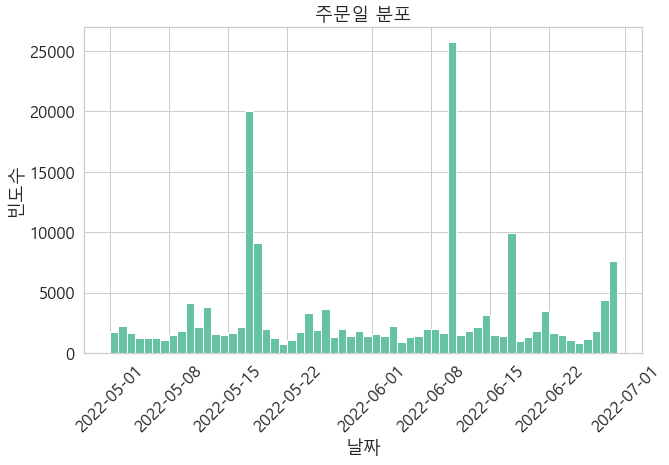

In [23]:
#주문일, 6월 10일과 5월 17일의 주문일이 몰려있는 경향 발견

df_n['주문일'] = pd.to_datetime(df_n['주문일'])
date_counts = df_n['주문일'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.hist(df_n['주문일'], bins='auto')
plt.title('주문일 분포')
plt.xlabel('날짜')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.show()


## 사은품 여부 

In [24]:
# 사은품여부, nan값을 제외한 상품들 중 사은품을 주는 상품들로는 꼬리곰탕, 백숫, 사골곰탕, 볶음밥의 비율이 제일 높았음  #가장 문제가 되는 nan값이 자재명에서 상품명대분류 컬럼을 방해하고 있음, 이값에 대한 정의가 필요함
df_n[df_n['사은품여부'] == 'Y']['상품명대분류'].value_counts(normalize = True).head()


        0.229325
꼬리곰탕    0.104275
햇반      0.049141
백숙      0.049141
사골곰탕    0.047143
Name: 상품명대분류, dtype: float64

## 출고예정일 

In [25]:
df_n['출고예정일'] = pd.to_datetime(df_n['출고예정일'], format = '%Y%m%d')

In [26]:
#출고예정일은 6월 11일, 5월 19일, 6월 19일, 5월 18일 순으로 점유율이 높음 #6월 10일과 5월 17일 # 출고예정일이 높게 나온 일들은 모두 주문일이 가장 높은 일수와 1~2일 차이가 나고 있음.
df_n['출고예정일'].value_counts(normalize = True).head()

2022-06-11    0.098387
2022-05-19    0.067559
2022-06-19    0.053780
2022-05-18    0.050689
2022-06-12    0.044404
Name: 출고예정일, dtype: float64

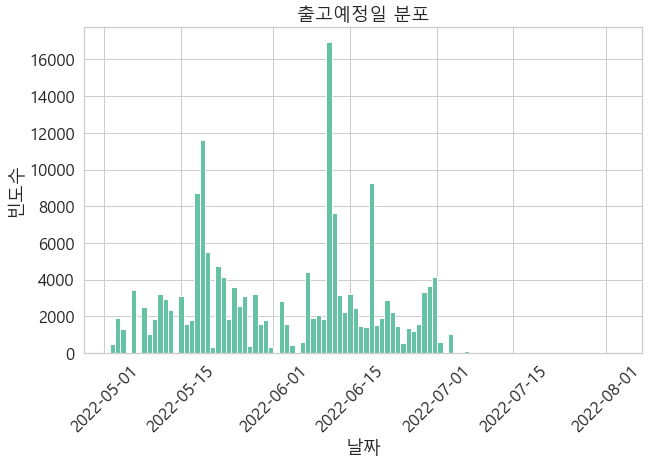

In [27]:
df_n['출고예정일'] = pd.to_datetime(df_n['출고예정일'])
date_counts = df_n['출고예정일'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.hist(df_n['출고예정일'], bins='auto')
plt.title('출고예정일 분포')
plt.xlabel('날짜')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.show()


## 주문/배송상태 

In [28]:
#주문/배송상태,  주문취소와 배송취소 항목을 확인하여 어떤 상품이 주문과 배송이 취소되었는 지 분석할 필요성이 있음
df_n['주문/배송상태'].value_counts(normalize= True)

배송 완료    0.971559
주문취소     0.027889
배송 취소    0.000314
배송 중     0.000209
주문완료     0.000017
배송 준비    0.000006
출고 지시    0.000006
Name: 주문/배송상태, dtype: float64

In [29]:
# 주문취소상품 햇반,콩기름,만두,설탕,주먹밥
df_n[df_n['주문/배송상태'] =='주문취소']['상품명대분류'].value_counts(normalize = True).head()

햇반     0.417830
콩기름    0.051448
만두     0.047282
설탕     0.040825
주먹밥    0.033326
Name: 상품명대분류, dtype: float64

In [30]:
# 배송취소상품 햇반,구이,설탕,스팸,고추장 
df_n[df_n['주문/배송상태'] =='배송 취소']['상품명대분류'].value_counts(normalize = True).head()

햇반     0.259259
구이     0.129630
설탕     0.111111
스팸     0.092593
고추장    0.074074
Name: 상품명대분류, dtype: float64

In [31]:
#클레임상태  #주문/배송상태와는 다른 반품과 교환롼료 라는 항목이 들어있고, 그에 따른 분석 가능
df_n['클레임 상태'].value_counts(normalize= True)

-        0.968399
취소완료     0.027889
반품처리중    0.001597
교환완료     0.001255
교환처리중    0.000749
반품철회     0.000087
반품완료     0.000017
반품신청     0.000006
Name: 클레임 상태, dtype: float64

In [32]:
#주문취소상품과 동일한 퍼센트를 가지고 있음
df_n[df_n['클레임 상태'] =='취소완료']['상품명대분류'].value_counts(normalize = True).head()

햇반     0.417830
콩기름    0.051448
만두     0.047282
설탕     0.040825
주먹밥    0.033326
Name: 상품명대분류, dtype: float64

In [33]:
# 반품처리중 상품 햇반,설탕,볶음밥,구이,고추장
df_n[df_n['클레임 상태'] =='반품처리중']['상품명대분류'].value_counts(normalize = True).head()

햇반     0.272727
설탕     0.123636
볶음밥    0.061818
구이     0.040000
교자     0.029091
Name: 상품명대분류, dtype: float64

In [34]:
weight=df_n['자재명']

In [35]:
df_n['중량'] = weight.str.extract(r'(\d+)')
df_n['중량']

0         500
1         400
2         500
3         500
4         500
         ... 
172142    500
172143    900
172144    210
172145    530
172146      3
Name: 중량, Length: 172147, dtype: object

In [36]:
# # 중량 추출하기
# df_n['중량'] = df_n['자재명'].str.extract('(\d+G)')

# # 새로운 컬럼 생성
# df_n['중량(숫자)'] = df_n['중량'].str.extract('(\d+)').astype(int)


-------

In [37]:
plus = df_n[df_n['상품코드'] == '사은품']


In [38]:
gift_n = plus[['상품명','상품명대분류','자재명','브랜드','사은품여부','구매월']] #사은품여부가 Y 인 데이터
gift = df_n[['상품명','상품명대분류','자재명','브랜드','사은품여부','구매월']] # 전체 데이터

In [39]:
gift_n['상품명대분류'].value_counts().head(10)  # 574는 상품이 아니라 사은품 그 자체임

    574
Name: 상품명대분류, dtype: int64

In [40]:
gift_n[gift_n['상품명대분류']=='']['상품명'].value_counts()

[사은품]더비비고 영양꼬리곰탕500g    170
[사은품_허닭몰] 더비비고_황기닭백숙    110
[사은품] 복주머니 파우치(그린)       91
[사은품] 더비비고_수삼갈비탕         72
[사은품] 갓빠오즈               70
[사은품_더마켓] 더비비고 쇼핑백       30
에어프라이어용 종이호일(20매)        12
[사은품] 메티에 전용 펌프          10
[사은품]피자 커터기               6
[사은품_더마켓]생선구이 웰컴키트        3
Name: 상품명, dtype: int64

----
## 꼬리곰탕  더비비고와 비비고의 차이
### 결과 5월에서 6월로 갈 때 더비비고 영양꼬리곰탕의 판매율이 100% 넘게 상승한 것으로 보아 해당상품의 경우  사은품을 통한 프로모션의 효과가 큰 것으로 추측함

In [41]:
gift_n[gift_n['상품명대분류']=='꼬리곰탕']['자재명'].value_counts()

Series([], Name: 자재명, dtype: int64)

In [42]:
# gift[gift[gift['구매월'] == '6']['자재명'] =='더비비고 영양꼬리곰탕 500G/상온']['사은품여부'].value_counts()


gift_6 = gift[gift['구매월'] == 6]
gift_6[gift_6['자재명'] =='더비비고 영양꼬리곰탕 500G/상온']['사은품여부'].value_counts()

Y    120
N      6
Name: 사은품여부, dtype: int64

In [43]:
gift_5 = gift[gift['구매월'] == 5]
gift_5[gift_5['자재명'] =='더비비고 영양꼬리곰탕 500G/상온']['사은품여부'].value_counts()

Y    57
N    10
Name: 사은품여부, dtype: int64

In [44]:
gift[gift['자재명'] =='비비고/꼬리곰탕460G/상온']['사은품여부'].value_counts()

N    188
Y     84
Name: 사은품여부, dtype: int64

https://www.hankookilbo.com/News/Read/A2020121413330000552 </br>
더비비고와 비비고의 차이 링크</br>
사은품 여부 중 더비비고의 수량이 더 많았음

---
# 햇반 
### 햇반은 유의미한 결과가 안나옴 

In [45]:
gift_n[gift_n['상품명대분류']=='햇반']['자재명'].value_counts()

Series([], Name: 자재명, dtype: int64)

In [46]:
gift[gift['자재명'] =='햇반210G*24(1입)/상온']['사은품여부'].value_counts()

N    19939
Y       21
Name: 사은품여부, dtype: int64

In [47]:
gift[gift['자재명'] =='햇반흑미밥210g']['사은품여부'].value_counts()

N    7447
Y      16
Name: 사은품여부, dtype: int64

In [48]:
gift[gift['자재명'] =='햇반/솥반 꿀약밥 210G']['사은품여부'].value_counts()

N    1961
Y      11
Name: 사은품여부, dtype: int64

In [49]:
gift[gift['자재명'] =='햇반/솥반 버섯영양밥 200G']['사은품여부'].value_counts()

N    1366
Y      10
Name: 사은품여부, dtype: int64

---
# 백숙
### 황기닭백숙은 구매가 꾸준하게 늘어가고 있는 상품 중 하나임, 엄청 큰 효과가 있는 건 아니었지만 사은품이 하락은 막을 수 있었다는 거에 의의를 둘 수 있음

In [50]:
gift_n[gift_n['상품명대분류']=='백숙']['자재명'].value_counts()

Series([], Name: 자재명, dtype: int64)

In [51]:
gift_6 = gift[gift['구매월'] == 6]
gift_6[gift_6['자재명'] =='더비비고 황기닭백숙 600G/상온']['사은품여부'].value_counts()

Y    67
Name: 사은품여부, dtype: int64

In [52]:
gift_5 = gift[gift['구매월'] == 5]
gift_5[gift_5['자재명'] =='더비비고 황기닭백숙 600G/상온']['사은품여부'].value_counts()

Y    47
N     1
Name: 사은품여부, dtype: int64

In [53]:
gift_6 = gift[gift['구매월'] == 6]
gift_6[gift_6['자재명'] =='더비비고_영양오리백숙 700G/상온']['사은품여부'].value_counts()


N    8
Y    5
Name: 사은품여부, dtype: int64

In [54]:
gift_5 = gift[gift['구매월'] == 5]
gift_5[gift_5['자재명'] =='더비비고_영양오리백숙 700G/상온']['사은품여부'].value_counts()

N    5
Y    4
Name: 사은품여부, dtype: int64

----
# 사골곰탕 
### 비비고/사골곰탕의 사은품 수가 많음, 1+1 행사가 사은품을 주는 것보다 효과가 좋은 것 같음

In [55]:
gift_n[gift_n['상품명대분류']=='사골곰탕']['자재명'].value_counts()

Series([], Name: 자재명, dtype: int64)

In [56]:
gift[gift['자재명'] =='비비고/사골곰탕 500G_18입/상온']['사은품여부'].value_counts()

N    3170
Y     111
Name: 사은품여부, dtype: int64

In [57]:
gift_5 = gift[gift['구매월'] == 5]
gift_5[gift_5['자재명'] =='비비고/사골곰탕 500G_18입/상온']['사은품여부'].value_counts()


N    1411
Y      57
Name: 사은품여부, dtype: int64

In [58]:

gift_6 = gift[gift['구매월'] == 6]
gift_6[gift_6['자재명'] =='비비고/사골곰탕 500G_18입/상온']['사은품여부'].value_counts()

N    1759
Y      54
Name: 사은품여부, dtype: int64

In [59]:
gift[gift['자재명'] =='비비고/한우사골곰탕500G/상온']['사은품여부'].value_counts()

N    238
Y      7
Name: 사은품여부, dtype: int64

---
# 볶음밥
### 유의미한 결과 X

In [60]:
gift_n[gift_n['상품명대분류']=='볶음밥']['자재명'].value_counts()

Series([], Name: 자재명, dtype: int64)

In [61]:
gift[gift['자재명'] =='고메/삼선해물볶음밥840G_4P/냉동']['사은품여부'].value_counts()

N    391
Y     44
Name: 사은품여부, dtype: int64

In [62]:
gift[gift['자재명'] =='고메/중화게살볶음밥840G_4P/냉동']['사은품여부'].value_counts()

N    365
Y     34
Name: 사은품여부, dtype: int64

In [63]:
gift[gift['자재명'] =='비비고/차돌깍두기볶음밥410G/냉동']['사은품여부'].value_counts()

N    887
Y      8
Name: 사은품여부, dtype: int64

----
# 갈비탕
### 비비고의 구매수량이 더 많음, 사은품 자체가 그렇게 큰 구매요인의 영향을 주는 건 아닌 것 같다는 결론임
### 두 상품의 가격비교 또한 진행했으나, 수삼갈비탕보다 그냥 갈비탕의 가격의 더 높은 것으로 판단되었고, 그 결과 그냥 갈비탕의 품질자체가 수삼갈비탕보다 더 좋은 것으로 판단되어 구매를 더 많이 하는 것으로 생각됨

In [64]:
gift_n[gift_n['상품명대분류']=='갈비탕']['자재명'].value_counts()

Series([], Name: 자재명, dtype: int64)

In [65]:
df_n.columns

Index(['거래처', '거래처주문번호', '주문일', '구매연도', '구매월', '구매일', '구매요일', '평일/주말', '사은품여부',
       '출고예정일', '주문/배송상태', '운송장등록_도착날짜', '클레임 상태', '배송기간', '운송장등록일자', '상품순번',
       '상품코드', '상품명', '상품수량', '덤상품수량', '상품유형', '상품타입', '매출액', '자재코드', '자재명',
       '초기자재수량', '주문수량', '취소수량', '반품수량', '배송유형', '마감구분', '플랜트 정보', '단독배송여부',
       'GS홈쇼핑주문번호', '실제_상품수량', '실질상품수량', '실질상품수량X주문수량', '브랜드', '상품명대분류', '용량',
       '중량'],
      dtype='object')

In [66]:
df_n[df_n['자재명'] == '더비비고_수삼갈비탕500G/상온'][['주문수량','매출액']]
#개당 8000원

,주문수량,매출액
87939,0,0
105290,0,0
105361,0,0
105828,0,0
106110,0,0
...,...,...
170771,0,0
171136,2,17960
171156,1,8850
171877,1,8980


In [67]:
df_n[df_n['자재명'] == '비비고/갈비탕 400G_18입/상온'][['주문수량','매출액']]
#개당 4000원

,주문수량,매출액
286,0,0
435,6,23330
526,6,25450
558,6,24570
563,6,23330
...,...,...
169863,6,26920
170039,6,26450
170773,6,28900
171087,6,26450


In [68]:
gift[gift['자재명'] =='더비비고_수삼갈비탕500G/상온']['사은품여부'].value_counts()

Y    76
N    11
Name: 사은품여부, dtype: int64

In [69]:
gift[gift['자재명'] =='비비고/갈비탕 400G_18입/상온']['사은품여부'].value_counts()

N    562
Y     20
Name: 사은품여부, dtype: int64

---
# 탕수육 
### 유의미한 결과 X

In [70]:
gift_n[gift_n['상품명대분류']=='탕수육']['자재명'].value_counts()

Series([], Name: 자재명, dtype: int64)

In [71]:
gift[gift['자재명'] =='고메 바삭쫄깃한 탕수육 900G_EBIZ/냉동']['사은품여부'].value_counts()

Y    70
N     8
Name: 사은품여부, dtype: int64

----

In [73]:
df_n[df_n['상품명대분류'] == '']['상품명대분류']

220        
449        
799        
802        
952        
         ..
171135     
171157     
171160     
171878     
172044     
Name: 상품명대분류, Length: 685, dtype: object